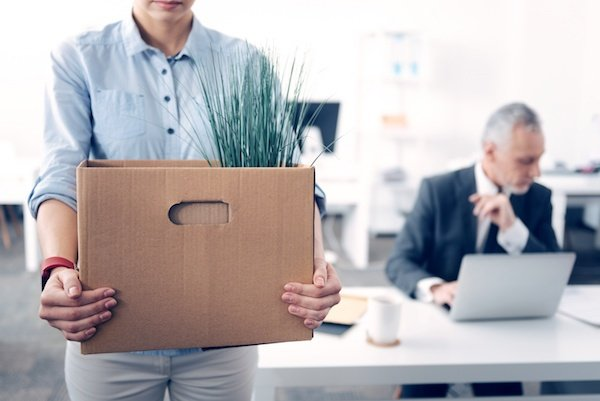


# Predictive HR Analytics
NB: In real applications data are way messy, I cannot tell you how overwhelming real life messy data can mess your day. Most public data sets are not as messy as we think. Found a cool memes, perhaps it will give you an idea about the reality between some kaggle data and real life application, I dont mean to scare you, it is the truth!.

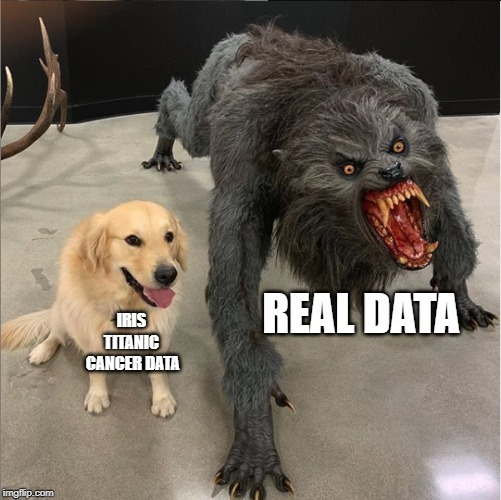
## Exploratory Data Analysis & Data Cleaning
## Why do we do Exploratory Analysis of the data
  - Better understanding of the data to identify relevant features/independent variables 
  - Make the cleaning process easier

## Common things to do during Exploratory Data Analysis (EDA)
- Check for 
   - Missing data
   - Duplicate
   - Data Consistencies
   - Data Type 
   - Correlations 
   - Distributions of features

## Why is Data Cleaning important
Remember garbage in garbage out, what ever you put in the model is what you get. 

## Common things to do during the data cleaning process
  - Standardizing
  - Encoding categorical variables
  - Anonymizing PI data

# About the Data

This IBM dataset is a publicly available dataset found on [Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/tasks). There are 1,470 employee data with 35 variables. This data set is very popular on the internet for HR analytics projects. Using the information about these 1,470 employees, the goal of this data set is to a model to predict employees likely to churn based on the following features:


 - **Age** :  Age in years of the employee           
 - **BusinessTravel** : How often an employee embark on a job related travel       
 - **DailyRate** : Daily rate at which an employee is paid              
 - **Department** : Department where the employee works         
 - **DistanceFromHome** : Distance an employee travels from home to work  
 - **Education** : Level of education of the employee                  
 - **EducationField** : What field the employee studied in school              
 - **EmployeeCount** : Count of employee        
 - **EmployeeNumber** : EMployee number      
 - **EnvironmentSatisfaction** : Employee environment satisfaction      
 - **Gender** : Gender of the employee                    
 - **HourlyRate** : Hourly rate of pay of the employee                
 - **JobInvolvement** : Employee job involvement ratings           
 - **JobLevel** : Employee Job level            
 - **JobRole** : Employee Job role           
 - **JobSatisfaction** : Employee Job Staisfaction  
 - **MaritalStatus** : Employee Marital Status      
 - **MonthlyIncome** : Employee monthly income      
 - **MonthlyRate** : Employee Monthly rate           
 - **NumCompaniesWorked** : Number of companies worked      
 - **Over18** : Age over 18 years                
 - **OverTime** : Work overtime            
 - **PercentSalaryHike** : Salary increment in Percentages   
 - **PerformanceRating** : Performance rating     
 - **RelationshipSatisfaction** : Relationship satisfaction
 - **StandardHours** : Employee standard hours worked              
 - **StockOptionLevel** Stock options level      
 - **TotalWorkingYears** Total working hours      
 - **TrainingTimesLastYear** : Total working years     
 - **WorkLifeBalance** : Work life balance rating      
 - **YearsAtCompany** : Years at the company       
 - **YearsInCurrentRole** : Years in current role     
 - **YearsSinceLastPromotion** : Years since last promotion  
 - **YearsWithCurrManager** : Years with current manager  


# Limitations of the data
In ML, understanding the data and its limitations are very key just like any other process involved in building the model. Agian, understanding the limitations of thd data will help greatly how we interprete the results. As someone who works as a people analyst, the data begs for a lot of questions. For example, employee attrition or turnover or churn comes in mainly two forms, voluntary and involuntary  trunover. Involuntary turnover occurs when en employee is terminated from his position due to varying reasons such as unsatisfactory job performance or inappropraite work behaviour. This type of turnover is good because these employees add little to no value to the organization and its in the best interest of the organization to let them go after the company has given them enough chances to redeem themselves. On the hand, voluntary turnover occurs when the employee terminates their position voluntary themselves. This type of turnover could be as a result of the employee getting a job outside the company, moving to a different job within the company or even retiring. And thid type of turnover is very expensive to the company, especially when top performers leave the company or position. For this reason the data does not provide any information about the type of turnover. I can only **assume** these are voluntary turnovers.

Again, any column with satisfaction in my experience was obtained through an engagement survey ( they have the same scale , 1-4). What i dont understand is what they mean for example by environment satisfaction and relationship satisfaction. Again i can only assume that these questions relate to the environment in which they work and relationship with the manager or employees. What I dont know is what scale they used in collecting this information, is it rating or ranking scale. The type of scale will determine the type of analysis.





*Lets dive into the data

In [1]:
# importing the following packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


#reading the data 
data = pd.read_csv('Hr_Analytics.csv')
data.head()


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis and Data Cleaning
## Using expert knowledge to drop columns
There are 34 features, although that deos not seem to be a lot, it is important we avoid feeding the model with irrelvant data points. With a little research and industry expert, we will drop certain columsn before we start with the exploration. We will drop daily rate, houry rate and monthly rate. The reason is because they are talking about compensation which we have the monthly income explaining. The monthly rate would have been preferred to the monthly income but this variable is very ambiguous. We will aslo drop columns, EmployeeCount, Over18, StandardHour because these contain just 1 distinct values. For the sake of data security (Very important in HR), we will also drop the PII EmployeeNumber. There is no evidence whatsover that shows how the type of degree studied affects voluntary turnover. Thus, we will drop the column EducationField

In [2]:
# Dropping irrelevant columns
data_irrelevant = ['DailyRate','EmployeeCount','EducationField','EmployeeNumber','HourlyRate','MonthlyRate','StandardHours','Over18']
data.drop(data_irrelevant,axis=1,inplace=True)
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,Sales,1,2,2,Female,3,2,...,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,Research & Development,8,1,3,Male,2,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,Research & Development,2,2,4,Male,2,1,...,3,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,Research & Development,3,4,4,Female,3,1,...,3,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,Research & Development,2,1,1,Male,3,1,...,3,4,1,6,3,3,2,2,2,2


# Explore Continuous Features


In [3]:
data.describe()

,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


It must be noted that, there are no missing values as indicated by the count row for all of the continous features. We confirm that with the heatmap

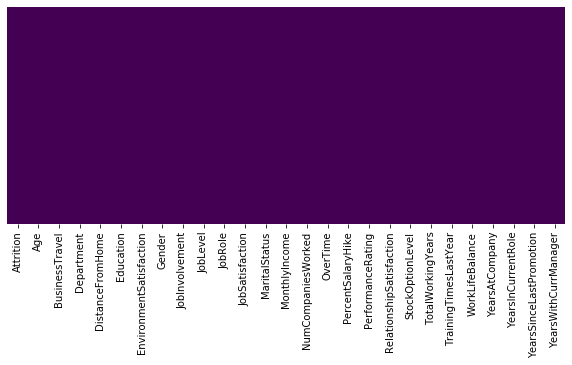

In [4]:
# heatmap to check the missing value 
plt.figure(figsize =(10, 4)) 
sns.heatmap(data.isnull(),  
            yticklabels = False, 
            cbar = False, 
            cmap ='viridis')

In [5]:
# Dropping categorical features
data_cat = ['BusinessTravel','Department','Gender','MaritalStatus','JobRole','OverTime']
data.drop(data_cat,axis=1,inplace=True)
data.head()

,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,2,2,3,2,4,5993,8,...,3,1,0,8,0,1,6,4,0,5
1,0,49,8,1,3,2,2,2,5130,1,...,4,4,1,10,3,3,10,7,1,7
2,1,37,2,2,4,2,1,3,2090,6,...,3,2,0,7,3,3,0,0,0,0
3,0,33,3,4,4,3,1,3,2909,1,...,3,3,0,8,3,3,8,7,3,0
4,0,27,2,1,1,3,1,2,3468,9,...,3,4,1,6,3,3,2,2,2,2


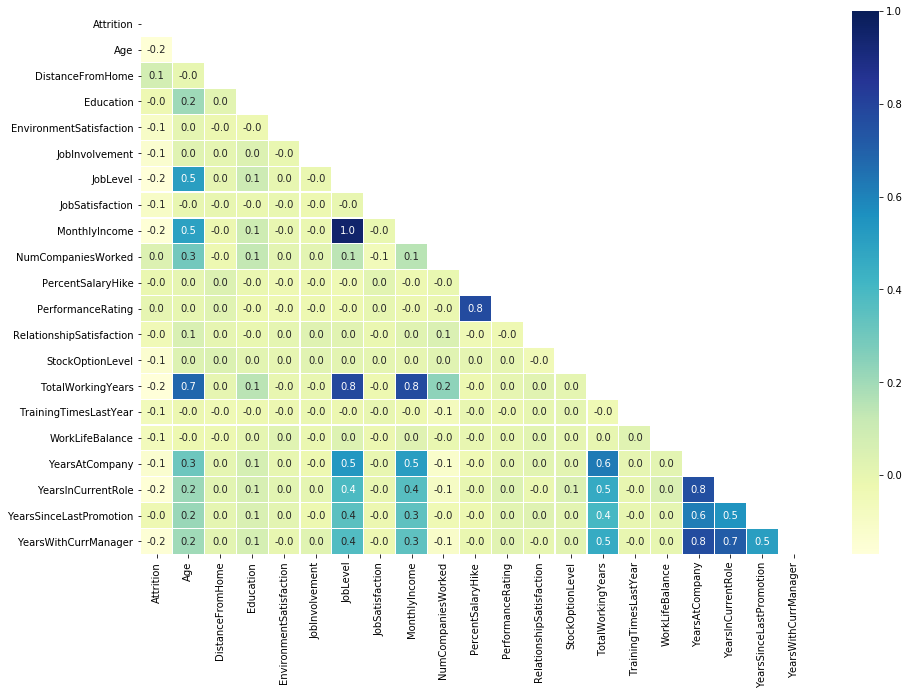

In [6]:
# Calculate correlations
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=1,
            mask=mask,
             annot=True, fmt='.1f',
            linewidths=.2, cmap="YlGnBu")

# Take notice of the correlations coefficient among the features. Multicollinearity definately exist here. I will use my industry experience to deal with the multicollinearity. take for example, all things been equal , the longer you work in an organization, the higher your job level. Again, same applies with income, you get paid higher the longer you stay with the company. Example, if you recieve 80k at the beggining of your career, all things been equal, you will get raises. We will drop all features that are multicolineary. 

In [7]:
# Dropping multicollineary features
data_cat = ['YearsInCurrentRole','JobLevel','PercentSalaryHike','YearsAtCompany', 'TotalWorkingYears', 'PerformanceRating']
data.drop(data_cat,axis=1,inplace=True)
data.head()

,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,2,2,3,4,5993,8,1,0,0,1,0,5
1,0,49,8,1,3,2,2,5130,1,4,1,3,3,1,7
2,1,37,2,2,4,2,3,2090,6,2,0,3,3,0,0
3,0,33,3,4,4,3,3,2909,1,3,0,3,3,3,0
4,0,27,2,1,1,3,2,3468,9,4,1,3,3,2,2


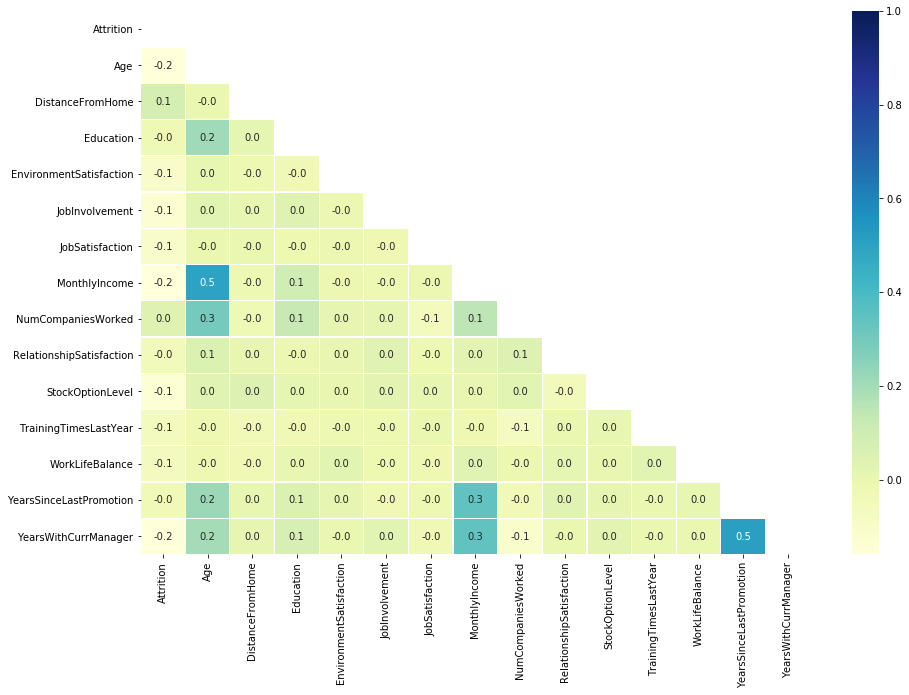

In [8]:
# Calculate correlations
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=1,
            mask=mask,
             annot=True, fmt='.1f',
            linewidths=.2, cmap="YlGnBu")

# Correlation is now better than before after taking care of multicollinearity features

Lets now understand which featurers are strong indicators of whether someone will churn or not. We will use the group by function to explore this. While this is not a complete way to understand the important features, it does give us a fair idea which features will likely stand out. For example the average age of someone who is likely to leave the company is lower than those who will stay. others include distance from home, monthly income, stock options, years since last promoted.

In [9]:
data.groupby('Attrition').mean()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,
0,37.561233,8.915653,2.927007,2.771290,2.770479,2.778589,6832.739659,2.645580,2.733982,0.845093,2.832928,2.781022,2.234388,4.367397
1,33.607595,10.632911,2.839662,2.464135,2.518987,2.468354,4787.092827,2.940928,2.599156,0.527426,2.624473,2.658228,1.945148,2.852321


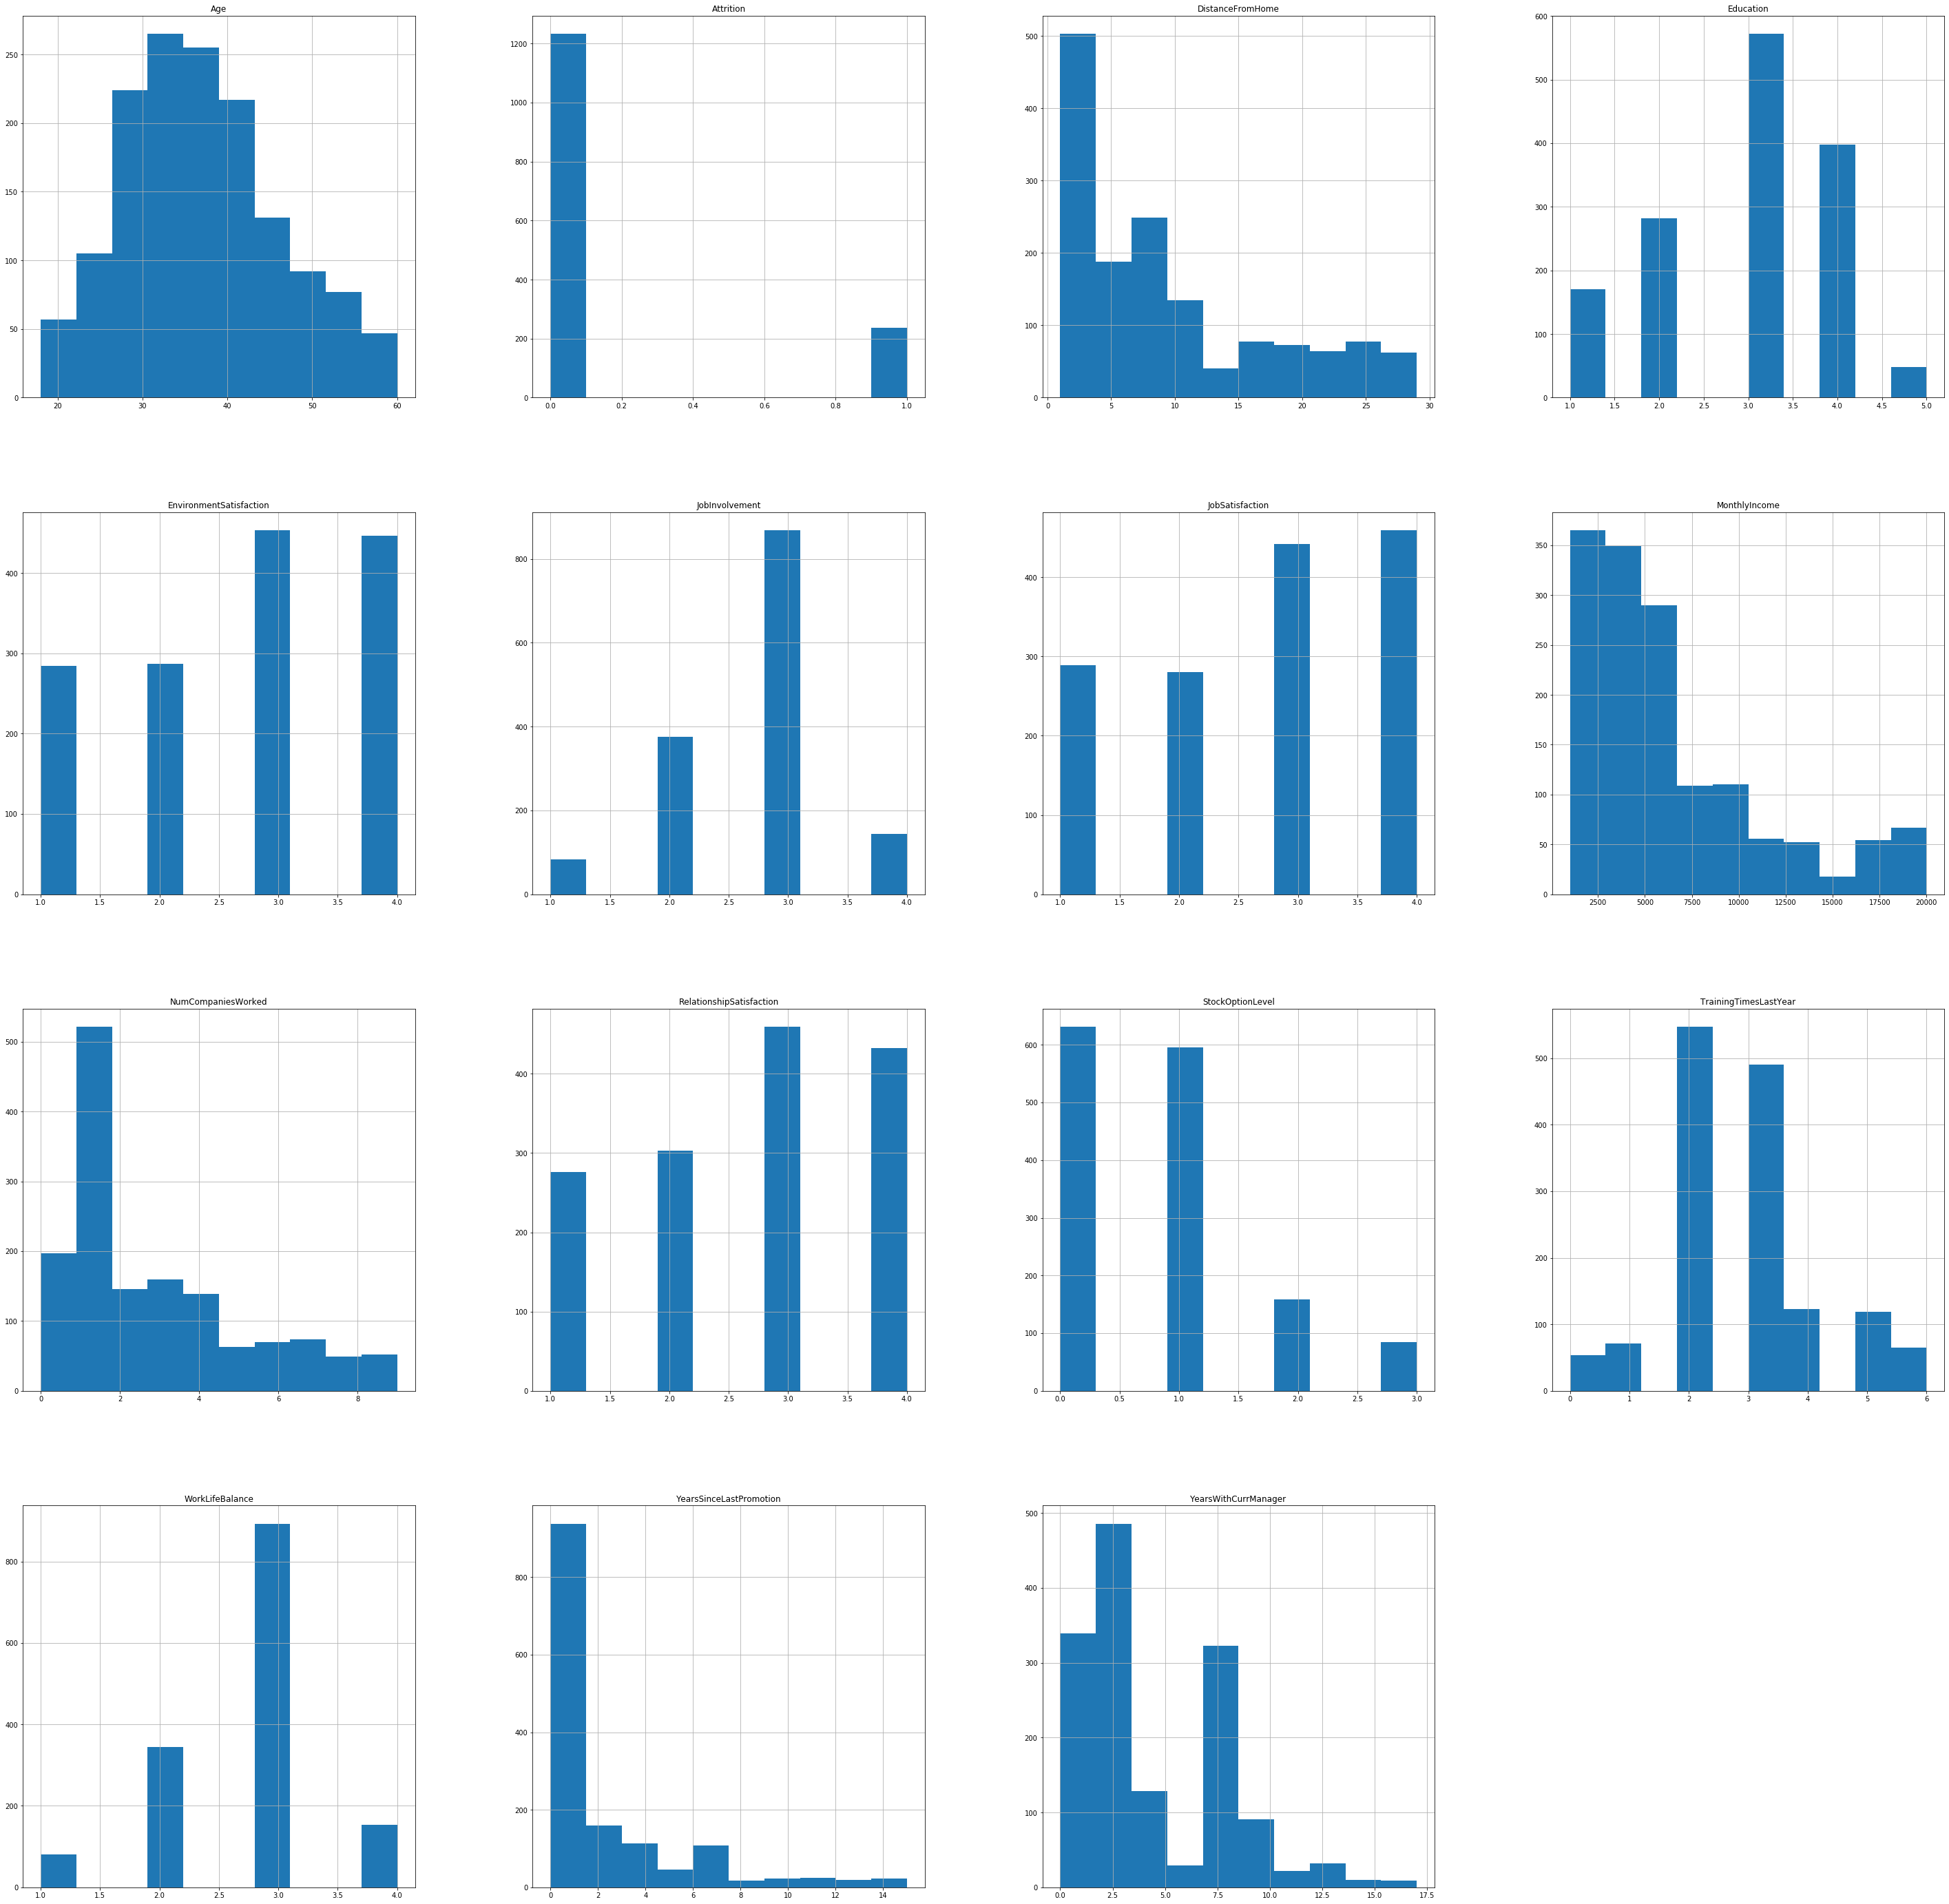

In [10]:
# check distribution of features
data.hist(figsize=(50,50))
plt.show()


<Figure size 432x288 with 0 Axes>

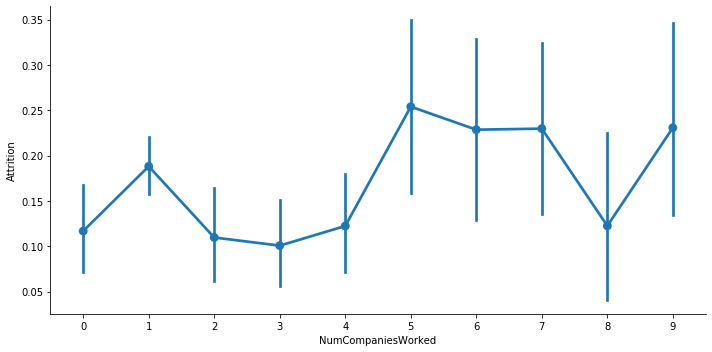

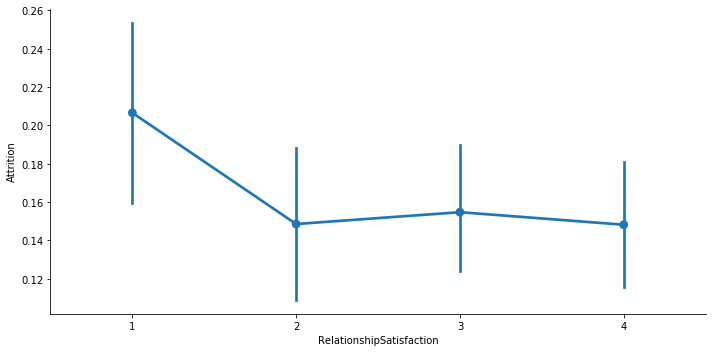

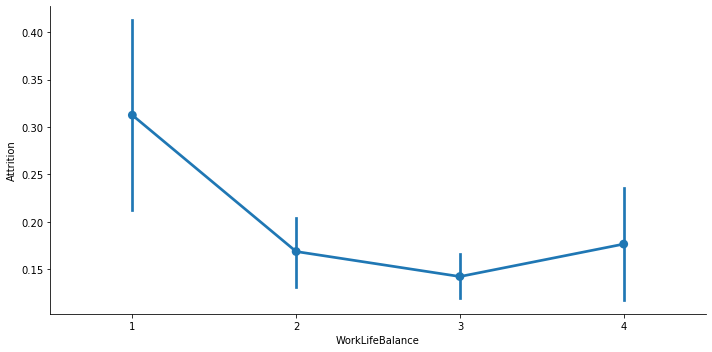

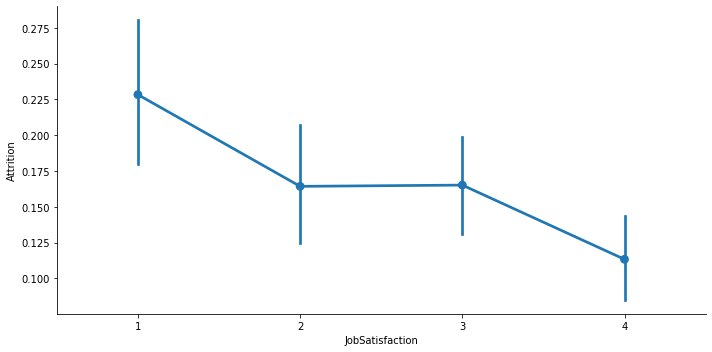

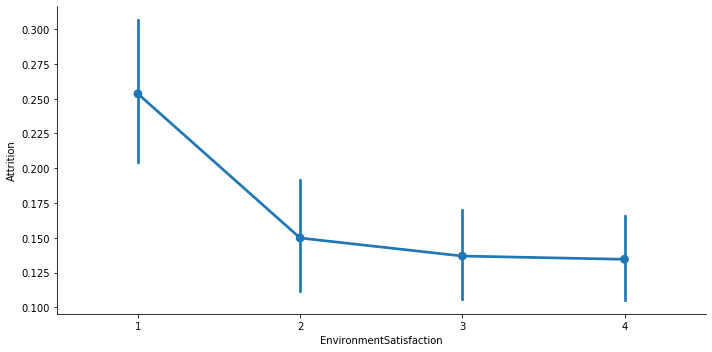

In [11]:
for i, col in enumerate (['NumCompaniesWorked','RelationshipSatisfaction',
          'WorkLifeBalance','JobSatisfaction','EnvironmentSatisfaction']):
        plt.figure(i)
        sns.catplot(x=col,y='Attrition',data=data,kind='point',aspect=2,)


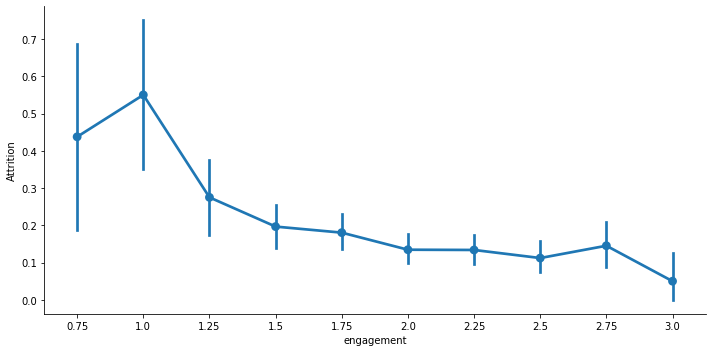

In [12]:
# merge all satisfactions into one feature
data['engagement'] = (data['EnvironmentSatisfaction']+ data['RelationshipSatisfaction'] +data['JobSatisfaction'])/4
sns.catplot(x='engagement',y='Attrition',data=data,kind='point',aspect=2,)

In [13]:
data.head()

,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,engagement
0,1,41,1,2,2,3,4,5993,8,1,0,0,1,0,5,1.75
1,0,49,8,1,3,2,2,5130,1,4,1,3,3,1,7,2.25
2,1,37,2,2,4,2,3,2090,6,2,0,3,3,0,0,2.25
3,0,33,3,4,4,3,3,2909,1,3,0,3,3,3,0,2.50
4,0,27,2,1,1,3,2,3468,9,4,1,3,3,2,2,1.75


In [14]:
data_en = ['EnvironmentSatisfaction','RelationshipSatisfaction','JobSatisfaction']
data.drop(data_en,axis=1,inplace=True)
data.head()


,Attrition,Age,DistanceFromHome,Education,JobInvolvement,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,engagement
0,1,41,1,2,3,5993,8,0,0,1,0,5,1.75
1,0,49,8,1,2,5130,1,1,3,3,1,7,2.25
2,1,37,2,2,2,2090,6,0,3,3,0,0,2.25
3,0,33,3,4,3,2909,1,0,3,3,3,0,2.50
4,0,27,2,1,3,3468,9,1,3,3,2,2,1.75


In [15]:
# importing the following packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#reading the data 
data = pd.read_csv('Hr_Analytics.csv')
data.head()


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
# Dropping irrelevant columns
data_irrelevant = ['DailyRate','EmployeeCount','EducationField','EmployeeNumber','HourlyRate','MonthlyRate','StandardHours','Over18']
data.drop(data_irrelevant,axis=1,inplace=True)
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,Sales,1,2,2,Female,3,2,...,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,Research & Development,8,1,3,Male,2,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,Research & Development,2,2,4,Male,2,1,...,3,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,Research & Development,3,4,4,Female,3,1,...,3,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,Research & Development,2,1,1,Male,3,1,...,3,4,1,6,3,3,2,2,2,2


In [17]:
# Dropping multicollineary features
data_cat = ['YearsInCurrentRole','JobLevel','PercentSalaryHike','YearsAtCompany', 'TotalWorkingYears', 'PerformanceRating']
data.drop(data_cat,axis=1,inplace=True)
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,Sales,1,2,2,Female,3,Sales Executive,...,Single,5993,8,Yes,1,0,0,1,0,5
1,0,49,Travel_Frequently,Research & Development,8,1,3,Male,2,Research Scientist,...,Married,5130,1,No,4,1,3,3,1,7
2,1,37,Travel_Rarely,Research & Development,2,2,4,Male,2,Laboratory Technician,...,Single,2090,6,Yes,2,0,3,3,0,0
3,0,33,Travel_Frequently,Research & Development,3,4,4,Female,3,Research Scientist,...,Married,2909,1,Yes,3,0,3,3,3,0
4,0,27,Travel_Rarely,Research & Development,2,1,1,Male,3,Laboratory Technician,...,Married,3468,9,No,4,1,3,3,2,2


In [18]:
# merge all satisfactions into one feature
data['engagement'] = (data['EnvironmentSatisfaction']+ data['RelationshipSatisfaction'] +data['JobSatisfaction'])/4
data_en = ['EnvironmentSatisfaction','RelationshipSatisfaction','JobSatisfaction']
data.drop(data_en,axis=1,inplace=True)
data.head()


,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobInvolvement,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,engagement
0,1,41,Travel_Rarely,Sales,1,2,Female,3,Sales Executive,Single,5993,8,Yes,0,0,1,0,5,1.75
1,0,49,Travel_Frequently,Research & Development,8,1,Male,2,Research Scientist,Married,5130,1,No,1,3,3,1,7,2.25
2,1,37,Travel_Rarely,Research & Development,2,2,Male,2,Laboratory Technician,Single,2090,6,Yes,0,3,3,0,0,2.25
3,0,33,Travel_Frequently,Research & Development,3,4,Female,3,Research Scientist,Married,2909,1,Yes,0,3,3,3,0,2.50
4,0,27,Travel_Rarely,Research & Development,2,1,Male,3,Laboratory Technician,Married,3468,9,No,1,3,3,2,2,1.75


In [19]:
#Convert categroical variables to numeric
gender_num={'Male':0,'Female':1}
data['Gender']=data['Gender'].map(gender_num)
OverTime_num={'Yes':1,'No':0}
data['OverTime']=data['OverTime'].map(OverTime_num)
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobInvolvement,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,engagement
0,1,41,Travel_Rarely,Sales,1,2,1,3,Sales Executive,Single,5993,8,1,0,0,1,0,5,1.75
1,0,49,Travel_Frequently,Research & Development,8,1,0,2,Research Scientist,Married,5130,1,0,1,3,3,1,7,2.25
2,1,37,Travel_Rarely,Research & Development,2,2,0,2,Laboratory Technician,Single,2090,6,1,0,3,3,0,0,2.25
3,0,33,Travel_Frequently,Research & Development,3,4,1,3,Research Scientist,Married,2909,1,1,0,3,3,3,0,2.50
4,0,27,Travel_Rarely,Research & Development,2,1,0,3,Laboratory Technician,Married,3468,9,0,1,3,3,2,2,1.75


In [20]:
#categorical data
categorical_cols = ['BusinessTravel', 'Department', 'JobRole', 'MaritalStatus'] 

#import pandas as pd
data = pd.get_dummies(data, columns = categorical_cols)
data.head()

,Attrition,Age,DistanceFromHome,Education,Gender,JobInvolvement,MonthlyIncome,NumCompaniesWorked,OverTime,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,41,1,2,1,3,5993,8,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0,49,8,1,0,2,5130,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,1,37,2,2,0,2,2090,6,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0,33,3,4,1,3,2909,1,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,27,2,1,0,3,3468,9,0,1,...,1,0,0,0,0,0,0,0,1,0


In [21]:
#know more about my Label to determine imbalanced data set
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

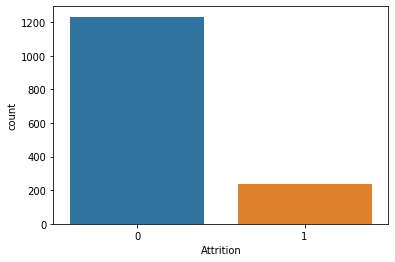

In [22]:
sns.countplot(x='Attrition',data=data)

# This is a clear indication of data imbalaced. So what do we do? We will apply both SMOTE and ADASYN to solve for the issue of data Imbalance 

In [23]:
from sklearn.model_selection import train_test_split
features=data.drop('Attrition',axis =1)

# Feature Scaling
names=features.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_scale= sc.fit_transform(features)
features=pd.DataFrame(features_scale,columns=names)

labels = data['Attrition']
labels=pd.DataFrame(labels,columns =['Attrition'])

In [24]:
features.shape

(1470, 32)

In SMOTE algorithm,minority class is over sampled by generating synthetic examples rather than by oversampling with replacement for simple random oversampling. To avoid the issue of over fitting when increasing minority sample class, SMOTE
creates synthetic data points by working within the current feature space. New synthetic data points are extracted from
interpolation, so the original data set still has significance. SMOTE interpolates values using a K - nearest neighboring
technique for each minority class instance and generates attribute values for new data instances [6].

A new synthetic data point is created for each minority sample data by taking the difference between the a minority
sample class feature vector and the nearest neighbor belonging to the same sample class and multiplying it by a random
number between 0 and 1 and then adding the results back to the minority sample class feature vector. This creates a
random line segment between every pair of existing features. This results in a new instance generated within the data
set [2]. The cycle is replicated for the remaining minority sample data  Source: [Handling Imbalanced Dataset: A Case Study for Binary Classification](https://arxiv.org/abs/2010.04326)

In [25]:
(np.random.seed(1234))
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_smote, y_smote = sm.fit_sample(features, labels)

In [26]:
y_smote.shape

(2466, 1)

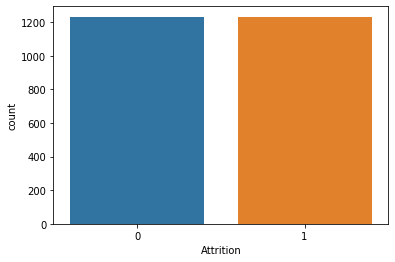

In [27]:
sns.countplot(x='Attrition',data=y_smote)

Now we can see equal number of instances between the two categories. If you want to know more about why we have to handle Imbalanced data set, please read the this article, [Handling Imbalanced Dataset: A Case Study for Binary Classification](https://arxiv.org/abs/2010.04326). It is very easy to comprehend for everyone. Now the data is ready to model. 


In [28]:

X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.4,random_state=54)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=54)

for dataset in [y_train,y_val,y_test]:
    print(round(len(dataset)/len(y_smote),2))

0.6
0.2
0.2


In [29]:
# Storing these data partition 
X_train.to_csv('C:/Users/Admin/Desktop/hr-analytics/train_features.csv', index=False)
X_val.to_csv('C:/Users/Admin/Desktop/hr-analytics/val_features.csv', index=False)
X_test.to_csv('C:/Users/Admin/Desktop/hr-analytics/test_features.csv', index=False)

y_train.to_csv('C:/Users/Admin/Desktop/hr-analytics/train_labels.csv', index=False)
y_val.to_csv('C:/Users/Admin/Desktop/hr-analytics/val_labels.csv', index=False)
y_test.to_csv('C:/Users/Admin/Desktop/hr-analytics/test_labels.csv', index=False)

# Logistic Regression- SMOTE

In [30]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')


In [31]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [32]:
lr=LogisticRegression()
parameters = {
    'C':[0.001,0.01,0.1,1,10,100,1000]
}

cv = GridSearchCV(lr,parameters,cv=5)
cv.fit(train_features,train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 10}

0.786 (+/-0.023) for {'C': 0.001}
0.808 (+/-0.031) for {'C': 0.01}
0.807 (+/-0.024) for {'C': 0.1}
0.807 (+/-0.023) for {'C': 1}
0.809 (+/-0.023) for {'C': 10}
0.808 (+/-0.023) for {'C': 100}
0.808 (+/-0.023) for {'C': 1000}


# Suport Vector Machine Learning : SMOTE


In [33]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

svm=SVC()
parameters = {
    'kernel':['linear','rbf'],
    'C':[0.1,1,10]
}

svm_cv = GridSearchCV(svm,parameters,cv=5)
svm_cv.fit(train_features,train_labels.values.ravel())

print_results(svm_cv)

BEST PARAMS: {'C': 10, 'kernel': 'rbf'}

0.809 (+/-0.025) for {'C': 0.1, 'kernel': 'linear'}
0.8 (+/-0.02) for {'C': 0.1, 'kernel': 'rbf'}
0.813 (+/-0.021) for {'C': 1, 'kernel': 'linear'}
0.868 (+/-0.015) for {'C': 1, 'kernel': 'rbf'}
0.812 (+/-0.022) for {'C': 10, 'kernel': 'linear'}
0.907 (+/-0.025) for {'C': 10, 'kernel': 'rbf'}


# Multilayer Perceptron - SMOTE

In [34]:
from sklearn.neural_network import MLPRegressor,MLPClassifier
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

mlp=MLPClassifier()
parameters = {
    'hidden_layer_sizes':[(10,),(50,),(100,)],
    'activation':['relu','tanh','logistic'],
    'learning_rate':['constant','invscaling','adaptive']
}

mlp_cv = GridSearchCV(mlp,parameters,cv=5)
mlp_cv.fit(train_features,train_labels.values.ravel())

print_results(mlp_cv)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}

0.841 (+/-0.019) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.842 (+/-0.042) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.825 (+/-0.032) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.879 (+/-0.032) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.88 (+/-0.027) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.884 (+/-0.035) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.89 (+/-0.044) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.894 (+/-0.05) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.888 (+/-0.034) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learni

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Random Forest - SMOTE 

In [35]:
# Import Random Forest Algorithm for Classification and regression

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

rf=RandomForestClassifier()
parameters = {
    'n_estimators':[5,50,250],
    'max_depth':[2,4,8,16,32,None]
}

rf_cv = GridSearchCV(rf,parameters,cv=5)
rf_cv.fit(train_features,train_labels.values.ravel())

print_results(rf_cv)


BEST PARAMS: {'max_depth': 32, 'n_estimators': 250}

0.771 (+/-0.025) for {'max_depth': 2, 'n_estimators': 5}
0.8 (+/-0.054) for {'max_depth': 2, 'n_estimators': 50}
0.815 (+/-0.044) for {'max_depth': 2, 'n_estimators': 250}
0.809 (+/-0.06) for {'max_depth': 4, 'n_estimators': 5}
0.847 (+/-0.033) for {'max_depth': 4, 'n_estimators': 50}
0.852 (+/-0.033) for {'max_depth': 4, 'n_estimators': 250}
0.865 (+/-0.036) for {'max_depth': 8, 'n_estimators': 5}
0.9 (+/-0.06) for {'max_depth': 8, 'n_estimators': 50}
0.913 (+/-0.034) for {'max_depth': 8, 'n_estimators': 250}
0.876 (+/-0.049) for {'max_depth': 16, 'n_estimators': 5}
0.92 (+/-0.027) for {'max_depth': 16, 'n_estimators': 50}
0.927 (+/-0.043) for {'max_depth': 16, 'n_estimators': 250}
0.875 (+/-0.037) for {'max_depth': 32, 'n_estimators': 5}
0.925 (+/-0.029) for {'max_depth': 32, 'n_estimators': 50}
0.931 (+/-0.052) for {'max_depth': 32, 'n_estimators': 250}
0.867 (+/-0.052) for {'max_depth': None, 'n_estimators': 5}
0.923 (+/-0.043) f

# Gradient Boosting - SMOTE

In [36]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

gb=GradientBoostingClassifier()
parameters = {
    'n_estimators':[5,50,250,500],
    'max_depth':[1,3,5,7,9],
    'learning_rate':[0.01,0.1,1,10,100]
}

gb_cv = GridSearchCV(gb,parameters,cv=5)
gb_cv.fit(train_features,train_labels.values.ravel())

print_results(gb_cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}

0.718 (+/-0.032) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.718 (+/-0.032) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.777 (+/-0.027) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.806 (+/-0.016) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.744 (+/-0.078) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.789 (+/-0.059) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.869 (+/-0.039) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.908 (+/-0.051) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.814 (+/-0.065) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.845 (+/-0.046) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.893 (+/-0.03) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.913 (+/-0.036) for {'learning_ra

# Xtreme Gradient Boosting: XGBoost¶- SMOTE

In [37]:
from xgboost import XGBClassifier,XGBRegressor
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

xg=XGBClassifier()
parameters = {
    'learning_rate':[0.3,0.6,1,10,100],
    'max_depth':[6,9,11,12,15]
}

xg_cv = GridSearchCV(xg,parameters,cv=5)
xg_cv.fit(train_features,train_labels.values.ravel())

print_results(xg_cv)

BEST PARAMS: {'learning_rate': 0.3, 'max_depth': 12}

0.913 (+/-0.04) for {'learning_rate': 0.3, 'max_depth': 6}
0.922 (+/-0.043) for {'learning_rate': 0.3, 'max_depth': 9}
0.921 (+/-0.043) for {'learning_rate': 0.3, 'max_depth': 11}
0.926 (+/-0.037) for {'learning_rate': 0.3, 'max_depth': 12}
0.924 (+/-0.042) for {'learning_rate': 0.3, 'max_depth': 15}
0.914 (+/-0.041) for {'learning_rate': 0.6, 'max_depth': 6}
0.917 (+/-0.04) for {'learning_rate': 0.6, 'max_depth': 9}
0.913 (+/-0.041) for {'learning_rate': 0.6, 'max_depth': 11}
0.916 (+/-0.046) for {'learning_rate': 0.6, 'max_depth': 12}
0.917 (+/-0.044) for {'learning_rate': 0.6, 'max_depth': 15}
0.909 (+/-0.036) for {'learning_rate': 1, 'max_depth': 6}
0.913 (+/-0.047) for {'learning_rate': 1, 'max_depth': 9}
0.907 (+/-0.032) for {'learning_rate': 1, 'max_depth': 11}
0.913 (+/-0.032) for {'learning_rate': 1, 'max_depth': 12}
0.91 (+/-0.037) for {'learning_rate': 1, 'max_depth': 15}
0.5 (+/-0.008) for {'learning_rate': 10, 'max_dept

In [38]:
# saving all the models created
# logistic regression
joblib.dump(cv.best_estimator_,'LG.pkl')

# svm
joblib.dump(svm_cv.best_estimator_,'svm.pkl')

# multilayer perceptron
joblib.dump(mlp_cv.best_estimator_,'mlp.pkl')

# logistic regression
joblib.dump(rf_cv.best_estimator_,'rf.pkl')

# Gradient Boosting
joblib.dump(gb_cv.best_estimator_,'gb.pkl')

# Gradient Boosting
joblib.dump(xg_cv.best_estimator_,'xg.pkl')

['xg.pkl']

# validate the models using the validation data


In [39]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [40]:
#iterating through the models built

from sklearn.metrics import accuracy_score,precision_score,recall_score
from time import time

models = {}

for mdl in  ['LG','svm','mlp','rf','gb','xg']:
    models[mdl] = joblib.load('C:/Users/Admin/Desktop/hr-analytics/{}.pkl'.format(mdl))

In [41]:
def evaluate_model(name, model, X_smote, y_smote):
    start = time()
    pred = model.predict(X_smote)
    end = time()
    accuracy = round(accuracy_score(y_smote, pred), 3)
    precision = round(precision_score(y_smote, pred), 3)
    recall = round(recall_score(y_smote, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 2)))

In [42]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LG -- Accuracy: 0.803 / Precision: 0.797 / Recall: 0.813 / Latency: 1.11ms
svm -- Accuracy: 0.935 / Precision: 0.902 / Recall: 0.976 / Latency: 21.65ms
mlp -- Accuracy: 0.923 / Precision: 0.9 / Recall: 0.951 / Latency: 0.0ms
rf -- Accuracy: 0.933 / Precision: 0.961 / Recall: 0.902 / Latency: 35.55ms
gb -- Accuracy: 0.933 / Precision: 0.969 / Recall: 0.894 / Latency: 15.63ms
xg -- Accuracy: 0.921 / Precision: 0.948 / Recall: 0.89 / Latency: 15.62ms


In this case, Recall will be the optimal metric. MLP will be the optimal model for this case since it has high recall with low latency compared with SVM with high recal and high latency. Sometimes, it will depend on what the business is willing to trade off, is it the latency or the evaluation metric.

In [43]:
evaluate_model('Multi Layer perceptron', models['mlp'], te_features, te_labels)

Multi Layer perceptron -- Accuracy: 0.919 / Precision: 0.896 / Recall: 0.953 / Latency: 0.0ms


# This is the end result for using SMOTE to handle data Imbalance. 

# In the next process, we will use ADASYN to handle for the data Imbalance.

# ADASYN
ADASYN tries to generate more synthetic instances on the region with less positive instances than one with more
positive instances to increase the recognition of positive. This algorithm uses the number of negative neighbors in
K-nearest neighbors of each positive instance to form a distribution function. The distribution function determines
how many synthetic instances are generated from that positive instance . For harder to learn minority samples,
ADASYN generates more synthetic data points/observations as compared to minority sample class that are easier to
learn. Ultimately, ADASYN is a pseudo-probabilistic algorithm in the sense that a fixed number instances is generated
for each minority instance based on a weighted distribution of its neighbors. Source: [Handling Imbalanced Dataset: A Case Study for Binary Classification](https://arxiv.org/abs/2010.04326)

In [44]:
from sklearn.model_selection import train_test_split
features=data.drop('Attrition',axis =1)

# Feature Scaling
names=features.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_scale= sc.fit_transform(features)
features=pd.DataFrame(features_scale,columns=names)

labels = data['Attrition']
labels=pd.DataFrame(labels,columns =['Attrition'])

In [45]:
data.head()

,Attrition,Age,DistanceFromHome,Education,Gender,JobInvolvement,MonthlyIncome,NumCompaniesWorked,OverTime,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,41,1,2,1,3,5993,8,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0,49,8,1,0,2,5130,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,1,37,2,2,0,2,2090,6,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0,33,3,4,1,3,2909,1,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,27,2,1,0,3,3468,9,0,1,...,1,0,0,0,0,0,0,0,1,0


In [46]:
(np.random.seed(1234))
from imblearn.over_sampling import ADASYN 
sa = ADASYN()
X_ad, y_ad = sm.fit_sample(features, labels)


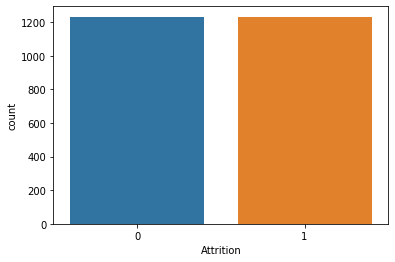

In [47]:
sns.countplot(x='Attrition',data=y_ad)

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X_ad,y_ad,test_size=0.4,random_state=54)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=54)

for dataset in [y_train,y_val,y_test]:
    print(round(len(dataset)/len(y_ad),2))

0.6
0.2
0.2


In [49]:
# Storing these data partition 
X_train.to_csv('C:/Users/Admin/Desktop/hr-analytics/train_features1.csv', index=False)
X_val.to_csv('C:/Users/Admin/Desktop/hr-analytics/val_features1.csv', index=False)
X_test.to_csv('C:/Users/Admin/Desktop/hr-analytics/test_features1.csv', index=False)

y_train.to_csv('C:/Users/Admin/Desktop/hr-analytics/train_labels1.csv', index=False)
y_val.to_csv('C:/Users/Admin/Desktop/hr-analytics/val_labels1.csv', index=False)
y_test.to_csv('C:/Users/Admin/Desktop/hr-analytics/test_labels1.csv', index=False)

# Logistic Regression- ADASYN

In [53]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

train_features1 = pd.read_csv('train_features1.csv')
train_labels1 = pd.read_csv('train_labels1.csv')


In [54]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [55]:
lr=LogisticRegression()
parameters = {
    'C':[0.001,0.01,0.1,1,10,100,1000]
}

cv = GridSearchCV(lr,parameters,cv=5)
cv.fit(train_features1,train_labels1.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 10}

0.786 (+/-0.023) for {'C': 0.001}
0.808 (+/-0.031) for {'C': 0.01}
0.807 (+/-0.024) for {'C': 0.1}
0.807 (+/-0.023) for {'C': 1}
0.809 (+/-0.023) for {'C': 10}
0.808 (+/-0.023) for {'C': 100}
0.808 (+/-0.023) for {'C': 1000}


# Suport Vector Machine Learning :ADASYN

In [56]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

svm=SVC()
parameters = {
    'kernel':['linear','rbf'],
    'C':[0.1,1,10]
}

svm_cv = GridSearchCV(svm,parameters,cv=5)
svm_cv.fit(train_features1,train_labels1.values.ravel())

print_results(svm_cv)

BEST PARAMS: {'C': 10, 'kernel': 'rbf'}

0.809 (+/-0.025) for {'C': 0.1, 'kernel': 'linear'}
0.8 (+/-0.02) for {'C': 0.1, 'kernel': 'rbf'}
0.813 (+/-0.021) for {'C': 1, 'kernel': 'linear'}
0.868 (+/-0.015) for {'C': 1, 'kernel': 'rbf'}
0.812 (+/-0.022) for {'C': 10, 'kernel': 'linear'}
0.907 (+/-0.025) for {'C': 10, 'kernel': 'rbf'}
